# Variables definition

In [1]:
import os
from dotenv import load_dotenv # requires python-dotenv

load_dotenv("./../../config/credentials_my.env")

openai_endpoint       = os.environ["openai_endpoint"]
openai_api_key        = os.environ["openai_api_key"]
openai_api_version    = "2024-05-01-preview"
azure_deployment_name = "gpt-4o-for-apim"

apim_endpoint         = os.environ["apim_endpoint"]
apim_subscription_key = os.environ["apim_subscription_key_premium"] # apim_subscription_key_* --> service, standard, premium
apim_api_version      = "2023-09-01-preview" # never used

messages = [
    {
      "role": "user",
      "content": "What is a meaning function? Please summarize in less than 20 words."
    }
]

print(f"openai_endpoint: {openai_endpoint}\napim_endpoint:   {apim_endpoint}")

openai_endpoint: https://mmoaiscus-01.openai.azure.com/
apim_endpoint:   https://mmapim1.azure-api.net/balanced-azure-openai-service-api/


# Invoking Open AI via HTTP
Invoking Azure OpenAI through HTTP requires to append `openai/` to the base Azure OpenAI endpoint, e.g.
- [https://mmoaiscus-01.openai.azure.com/](https://mmoaiscus-01.openai.azure.com/) must become:
- [https://mmoaiscus-01.openai.azure.com/openai/](https://mmoaiscus-01.openai.azure.com/openai)

In [2]:
import requests

messages_json = {"messages": messages}

url = f"{openai_endpoint}openai/deployments/{azure_deployment_name}/chat/completions?api-version={openai_api_version}" # "openai/" was appended
print(f'This is the Open AI endpoint and body that will be invoked:\n- {url}\n- {messages_json}')

This is the Open AI endpoint and body that will be invoked:
- https://mmoaiscus-01.openai.azure.com/openai/deployments/gpt-4o-for-apim/chat/completions?api-version=2024-05-01-preview
- {'messages': [{'role': 'user', 'content': 'What is a meaning function? Please summarize in less than 20 words.'}]}


In [3]:
response_http = requests.post(url, headers = {'api-key':openai_api_key}, json = {"messages": messages})

if (int(response_http.status_code / 100))==2:
    print(f"{response_http.json()['choices'][0]['message']['content']}\nx-ms-region = {response_http.headers['x-ms-region']}")
else:
    print(response_http.text)

A meaning function assigns semantic values to linguistic expressions within a formal system.
x-ms-region = South Central US


# Invoking Open AI via Azure SDK
In this case, the SDK expects the "pure" Azure OpenAI endpoint [https://mmoaiscus-01.openai.azure.com/](https://mmoaiscus-01.openai.azure.com/), which will be used internally to make the call.<br/>
In other words, in a trasparent way for the Developer whose task is just to pass the "pure" Azure OpenAI endpoint, the Azure OpenAI SDK receives it and then internally appends the `openai/` string to the base endpoint to make it work.

In [4]:
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint = openai_endpoint,
    api_key        = openai_api_key,
    api_version    = openai_api_version
)

In [5]:
response_sdk = client.chat.completions.create(
    model    = azure_deployment_name,
    messages = messages)

print(response_sdk.choices[0].message.content)

A meaning function maps elements of language (words, sentences) to their semantic interpretations or meanings.


# Creating the API for APIM
If we flag "Improve SDK Compatibility" is enabled, then 
- the APIM service keeps the original path "{APIM_ENDPOINT}/{APIM_API}/" like [https://genaihackapim.azure-api.net/balanced-azure-openai-service-api/](https://genaihackapim.azure-api.net/balanced-azure-openai-service-api/) (without `openai/`)
- the Base URL contains 'openai/' at the end


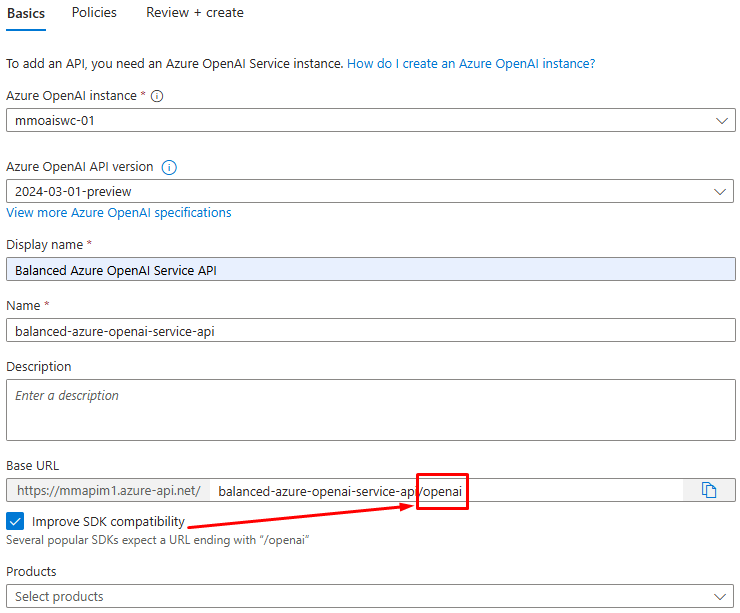

# Invoking APIM via HTTP
To be consistent with Azure OpenAI service, the APIM endpoint that we pass includes just the base endpoint, plus the API name like [https://genaihackapim.azure-api.net/balanced-azure-openai-service-api/](https://genaihackapim.azure-api.net/balanced-azure-openai-service-api/).<br/>

So, as we did with Azure OpenaI, now that we invoke APIM through HTTP we need to append `openai/` to the base Azure endpoint, e.g.
- [https://genaihackapim.azure-api.net/balanced-azure-openai-service-api/](https://genaihackapim.azure-api.net/balanced-azure-openai-service-api/) must become:
- [https://genaihackapim.azure-api.net/balanced-azure-openai-service-api/openai/](https://mmoaiscus-01.openai.azure.com/openai)

In [6]:
import requests

messages_json = {"messages": messages}

url = f"{apim_endpoint}openai/deployments/{azure_deployment_name}/chat/completions?api-version={openai_api_version}"
print(f'This is the Open AI endpoint and body that is invoked:\n- {url}\n- {messages_json}')

This is the Open AI endpoint and body that is invoked:
- https://mmapim1.azure-api.net/balanced-azure-openai-service-api/openai/deployments/gpt-4o-for-apim/chat/completions?api-version=2024-05-01-preview
- {'messages': [{'role': 'user', 'content': 'What is a meaning function? Please summarize in less than 20 words.'}]}


In [7]:
response_http = requests.post(url, headers = {'api-key':apim_subscription_key}, json = {"messages": messages})
if (int(response_http.status_code / 100))==2:
    print(f"{response_http.json()['choices'][0]['message']['content']}\nx-ms-region = {response_http.headers['x-ms-region']}")
else:
    print(response_http.text)

A meaning function assigns semantic interpretations to linguistic expressions, linking them to their meanings in a systematic way.
x-ms-region = Sweden Central


# Invoking APIM via Azure SDK

In [8]:
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint = apim_endpoint,
    api_key        = apim_subscription_key,
    api_version    = openai_api_version
)

In [9]:
response_sdk = client.chat.completions.create(
    model    = azure_deployment_name,
    messages = messages)

print(response_sdk.choices[0].message.content)

A meaning function assigns semantic meanings to linguistic expressions within a specific context or interpretive framework.


## Loading test
### Recall to set count=1 in failureCondition before running the next cell!

In [10]:
from datetime import datetime
for i in range(200):
    response_sdk = client.chat.completions.create(
        model    = azure_deployment_name,
        messages = messages)

    print(f"step {i+1} at {datetime.now()}: {response_sdk.choices[0].message.content}")

step 1 at 2025-01-22 19:53:04.597122: A meaning function assigns semantic values to expressions in a language, determining their meaning within a given context.
step 2 at 2025-01-22 19:53:04.928437: A meaning function assigns semantic values to linguistic expressions, thereby facilitating understanding and interpretation of language.
step 3 at 2025-01-22 19:53:05.211366: A meaning function maps linguistic expressions to their interpretations or meanings in a given context.

step 4 at 2025-01-22 19:53:05.504314: A meaning function assigns semantic values to linguistic expressions in a formal language or system.
step 5 at 2025-01-22 19:53:05.792292: A meaning function maps words or phrases to their meanings or semantic representations in computational linguistics.
step 6 at 2025-01-22 19:53:15.871410: A meaning function maps expressions to their meanings within a particular linguistic or formal system.
step 7 at 2025-01-22 19:53:16.384105: A meaning function maps linguistic expressions t